In [ ]:
# This is predecessor code for reading in FITS images taken at different times, and checking 
# differences between the PSFs (there shouldn't be any)

# Created 2021 June 29 by E.S.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import photutils
from photutils import DAOStarFinder
import numpy as np
import pandas as pd
import glob
import os

In [2]:
# pre-ship data

x_asu_pre = np.array([0.097394, 0.139862, 0.097394, 0.267283, 0.097394, 0.097394, 0.437186])
y_asu_pre = np.array([-1.449999, -1.449999, -1.492468, -1.449999, -1.619893, -1.789784, -1.449999])
tip_lowfs_pre = np.array([-21.655, -21.6994, -21.9626, -21.795, -22.7457, -23.8247, -21.835])
tilt_lowfs_pre = np.array([32.6854, 32.9883, 32.6578, 33.8382, 32.7019, 32.7365, 34.8445])

In [3]:
# post-ship

x_asu_post = np.array([0.097394, 0.139862, 0.097394, 0.267283, 0.097394, 0.097394, 0.437186])
y_asu_post = np.array([-1.449999, -1.449999, -1.449999, -1.449999, -1.619893, -1.789784, -1.449999])
tip_lowfs_post = np.array([12.2488, 10.5643, 12.2343, 3.02136, -180.564, 53.3684, -7.68735])
tilt_lowfs_post = np.array([62.4282, 117.013, 62.5374, 187.134, 56.035, 50.696, -168.345])

In [4]:
# post-ship values as plotted directly *almost* seem to wrap around 180 (but do not), and 
# these are supposed to be in mas, not deg

In [6]:
res_tilt = np.polyfit(x_asu_pre,tilt_lowfs_pre,deg=1)
print(res_tilt)

[ 6.37672217 32.08347398]


In [7]:
res_tip = np.polyfit(y_asu_pre,tip_lowfs_pre,deg=1)
print(res_tip)

[  6.09753166 -12.89439377]


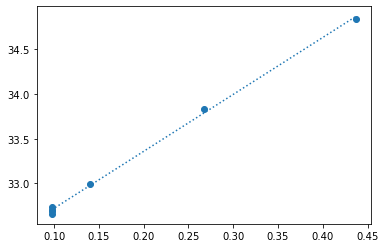

In [10]:
# pre-ship plot, for comparison

x_vals = [x_asu_pre[0],x_asu_pre[-1]]
plt.plot(x_vals,np.multiply(res_tilt[0],x_vals)+res_tilt[1], linestyle=":")
plt.scatter(x_asu_pre,tilt_lowfs_pre)
plt.show()

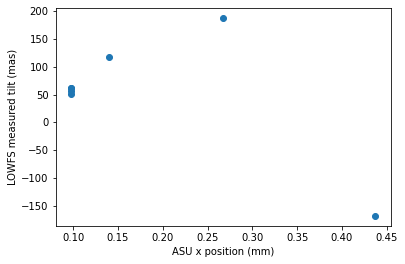

In [11]:
plt.scatter(x_asu_post,tilt_lowfs_post)
plt.xlabel("ASU x position (mm)")
plt.ylabel("LOWFS measured tilt (mas)")
plt.savefig("junk.jpg")

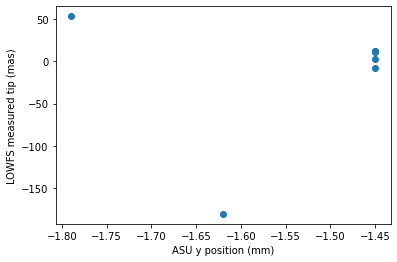

In [12]:
plt.scatter(y_asu_post,tip_lowfs_post)
plt.xlabel("ASU y position (mm)")
plt.ylabel("LOWFS measured tip (mas)")
plt.savefig("junk.jpg")